In [2]:
# Importing necessary libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from access import Access, weights, Datasets
import geopandas as gpd
from shapely import wkt
import access
# Custom functions
from modified_access import *
Access.mod_three_stage_fca = class_mod_three_stage_fca
import math

In [37]:
# Gaussian decay function
def gaussian_decay(distance, sigma = 5):
    return np.exp(-distance**2/(2*sigma**2))

gaussian_decay(2, 1)

0.1353352832366127

Checking if our gaussian decay is the same as the one in the library

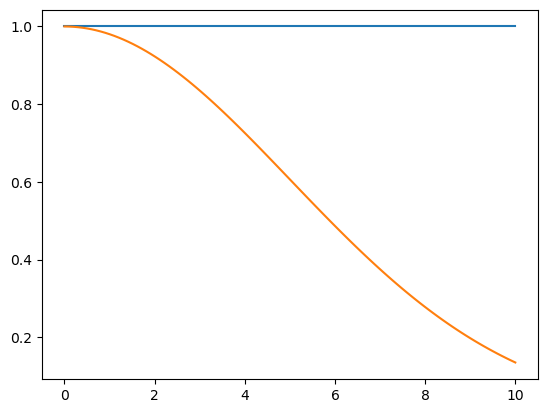

In [38]:


# Plot of the gaussian decay function
x = np.linspace(0, 10, 100)
y = gaussian_decay(x, 5)
y2 = weights.gaussian(5000)(x)
plt.plot(x, y2)
plt.plot(x, y)
plt.show()

#### Calculating first by hand

In [70]:
# demand
h1 = 30
h2 = 20
h3 = 10

# supply
s1 = 30
s2 = 20

# quality
c1 = 0.8
c2 = 0.5

# distance
d11 = 5
d12 = 2
d21 = 4
d22 = 1
d31 = 3
d32 = 2

# gaussian weights
w11 = gaussian_decay(d11)
w12 = gaussian_decay(d12)
w21 = gaussian_decay(d21)
w22 = gaussian_decay(d22)
w31 = gaussian_decay(d31)
w32 = gaussian_decay(d32)

# sigma
sigma = 5

# Selection weight
g11 = (w11 * c1)/(w11 * c1 + w12 * c2)
g12 = (w12 * c2)/(w11 * c1 + w12 * c2)
g21 = (w21 * c1)/(w21 * c1 + w22 * c2)
g22 = (w22 * c2)/(w21 * c1 + w22 * c2)
g31 = (w31 * c1)/(w31 * c1 + w32 * c2)
g32 = (w32 * c2)/(w31 * c1 + w32 * c2)

# Weighted provider/demand ratio for each provider
r1 = s1/((h1 * w11 * g11) + (h2 * w21 * g21) + (h3 * w31 * g31))
r2 = s2/((h1 * w12 * g12) + (h2 * w22 * g22) + (h3 * w32 * g32))

# accessibility between each provider and demand
a11 = r1 * w11 * g11
a12 = r2 * w12 * g12
a21 = r1 * w21 * g21
a22 = r2 * w22 * g22
a31 = r1 * w31 * g31
a32 = r2 * w32 * g32

# Weighted provider/demand ratio for each demand point
A1 = a11 + a12
A2 = a21 + a22
A3 = a31 + a32

# Average quality for each demand point
Q1 = (a11 * c1 + a12 * c2)/(a11 + a12)
Q2 = (a21 * c1 + a22 * c2)/(a21 + a22)
Q3 = (a31 * c1 + a32 * c2)/(a31 + a32)


print(f"Accessibility values: \nA1: {A1}, A2: {A2}, A3: {A3}")
print(f"Quality values: \nQ1: {Q1}, Q2: {Q2}, Q3: {Q3}")

Accessibility values: 
A1: 0.7641130493060578, A2: 0.8754581847071607, A3: 0.9567444826675047
Quality values: 
Q1: 0.6653466163140159, Q2: 0.68285921422904, Q3: 0.7098766082202663


#### Calculating using the module

In [56]:
supply_df = pd.DataFrame({'index': [1,2], 'supply': [s1, s2]})
demand_df = pd.DataFrame({'index': [1,2,3], 'demand': [h1, h2, h3]})
cost_df = pd.DataFrame({'origin': [1,1,2,2,3,3], 'dest': [1,2,1,2,1,2], 'cost': [d11, d12, d21, d22, d31, d32], 'quality': [c1, c2, c1, c2, c1, c2]})

In [58]:
A = Access(
    demand_df=demand_df,
    demand_index="index",
    demand_value="demand",
    supply_df=supply_df,
    supply_index="index",
    supply_value=["supply"],
    cost_df=cost_df,
    cost_origin="origin",
    cost_dest="dest",
    cost_name="cost"
)

In [59]:
gaussian = weights.gaussian(5)   

# Access metrics to calculate
A.mod_three_stage_fca(name = "mod_3sfca", quality_name = 'Q', quality='quality', weight_fn=gaussian, cost = "cost")
A.three_stage_fca(name = "3sfca", weight_fn=gaussian, cost = "cost",)
A.access_df

,demand,mod_3sfca_supply,Q_supply,3sfca_supply
index,,,,
1,30,0.764113,0.665347,0.755015
2,20,0.875458,0.682859,0.877047
3,10,0.956744,0.709877,0.980860


Same results!!